In [1]:
from keras.datasets import mnist 
from random import randint
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [2]:
from tensorflow.keras.utils import to_categorical
import keras.utils
from keras.utils import np_utils

In [3]:
from keras.models import Sequential 
from keras.layers import Dense

In [4]:
!pip install keras

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


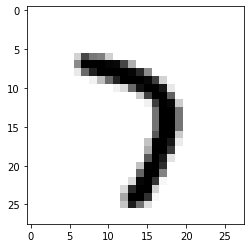

In [6]:
plt.imshow(x_train[randint(0,x_train.shape[0])],cmap='gray_r')

In [7]:
#Munge data
#Transform from matrix to vector, cast and normalise
image_size=28*28
x_train=x_train.reshape(x_train.shape[0],image_size)
x_train.astype('float32')
x_train=x_train/255.0

In [8]:
x_test=x_test.reshape(x_test.shape[0],image_size)
x_test.astype('float32')
x_test=x_test/255.0
x_train=tf.convert_to_tensor(x_train)

In [9]:
y_train=keras.utils.np_utils.to_categorical(y_train,10)
y_test=keras.utils.np_utils.to_categorical(y_test,10)

In [10]:
y_train=tf.convert_to_tensor(y_train)

In [11]:
model=Sequential()

In [12]:
layer_input=Dense(units=512,
                  activation='sigmoid',
                  input_shape=(image_size,)) #arbitrary number trial and error
model.add(layer_input)

In [13]:
#Add one more layer
model.add(Dense(units=512,activation='sigmoid'))

In [14]:
#Define output layer
layer_output=Dense(units=10,activation='softmax')
model.add(layer_output)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )

In [17]:
model.fit(x_train, y_train,epochs=6,validation_split=0.1)

Epoch 1/6
1688/1688 [==============================] - 14s 8ms/step - loss: 2.1507 - accuracy: 0.3384 - val_loss: 1.8922 - val_accuracy: 0.6363
Epoch 2/6
1688/1688 [==============================] - 13s 8ms/step - loss: 1.4921 - accuracy: 0.6699 - val_loss: 1.0484 - val_accuracy: 0.7792
Epoch 3/6
1688/1688 [==============================] - 13s 8ms/step - loss: 0.8890 - accuracy: 0.7859 - val_loss: 0.6664 - val_accuracy: 0.8580
Epoch 4/6
1688/1688 [==============================] - 14s 8ms/step - loss: 0.6551 - accuracy: 0.8311 - val_loss: 0.5149 - val_accuracy: 0.8783
Epoch 5/6
1688/1688 [==============================] - 14s 8ms/step - loss: 0.5442 - accuracy: 0.8530 - val_loss: 0.4358 - val_accuracy: 0.8900
Epoch 6/6
1688/1688 [==============================] - 14s 9ms/step - loss: 0.4814 - accuracy: 0.8693 - val_loss: 0.3887 - val_accuracy: 0.8987


In [18]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=True)

313/313 [==============================] - 2s 4ms/step - loss: 0.4375 - accuracy: 0.8786
